In [1]:
!python -m pip install seaborn
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def generate_plot(files,title):
    results = pd.read_csv(files[0]).T
    results['step'] = range(results.shape[0])

    results_2 = pd.read_csv(files[1]).T
    results_2['step'] = range(results_2.shape[0])
    results_2_value = pd.melt(results_2,id_vars='step').drop(['variable'],axis=1)['value']

    results_3 = pd.read_csv(files[2]).T
    results_3['step'] = range(results_3.shape[0])
    results_3_value = pd.melt(results_3,id_vars='step').drop(['variable'],axis=1)['value']

    df = pd.melt(results,id_vars='step').drop('variable',axis=1)
    df['experiment 2'] = results_2_value
    df['experiment 3'] = results_3_value
    
    df.columns = ['step','300','600','1000']

    plt = sns.lineplot(x='step', y='value', hue='variable', 
                data=pd.melt(df, ['step'])
                  )
    plt.set_title(title)
    plt.set(xlabel='Steps')
    plt.set(ylabel='Minerals Collected')
    plt.legend(title='Thresholds')
    
    fig = plt.get_figure()
    fig.savefig(f'{title}.png')

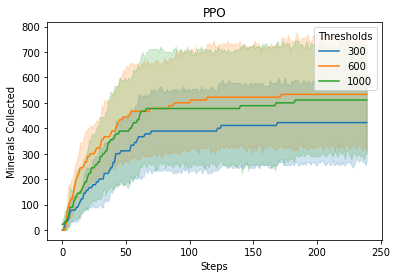

In [3]:
files = [   'experiment_16_300_PPO_step_results.csv',
            'experiment_16_600_PPO_step_results.csv',
            'experiment_16_1000_PPO_step_results.csv',
        ]

generate_plot(files,'PPO')

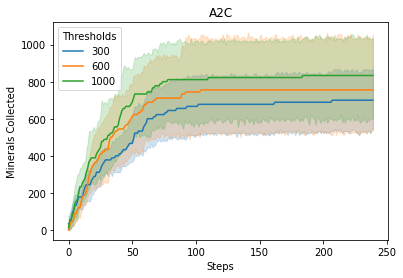

In [4]:
files = [
    

'experiment_17_300_A2C_step_results.csv',
'experiment_17_600_A2C_step_results.csv',
'experiment_17_1000_A2C_step_results.csv',
        ]
generate_plot(files,'A2C')

In [ ]:
files = [

'experiment_18_300_DQN_step_results.csv',
'experiment_18_600_DQN_step_results.csv',
'experiment_18_1000_DQN_step_results.csv',
]
generate_plot(files,'DQN')